## **Import libraries**

In [28]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
from zipfile import ZipFile
from io import BytesIO
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

## **Load the 'Dry Bean' dataset**

In [29]:
# Load the Dry Bean dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

# Read the Excel file from the ZIP archive
with ZipFile(BytesIO(requests.get(url).content)) as z:
    with z.open('DryBeanDataset/Dry_Bean_Dataset.xlsx') as f:
        beans = pd.read_excel(f)

## **Observe the data**

In [30]:
beans.info()
beans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## **Exploratory data analysis**

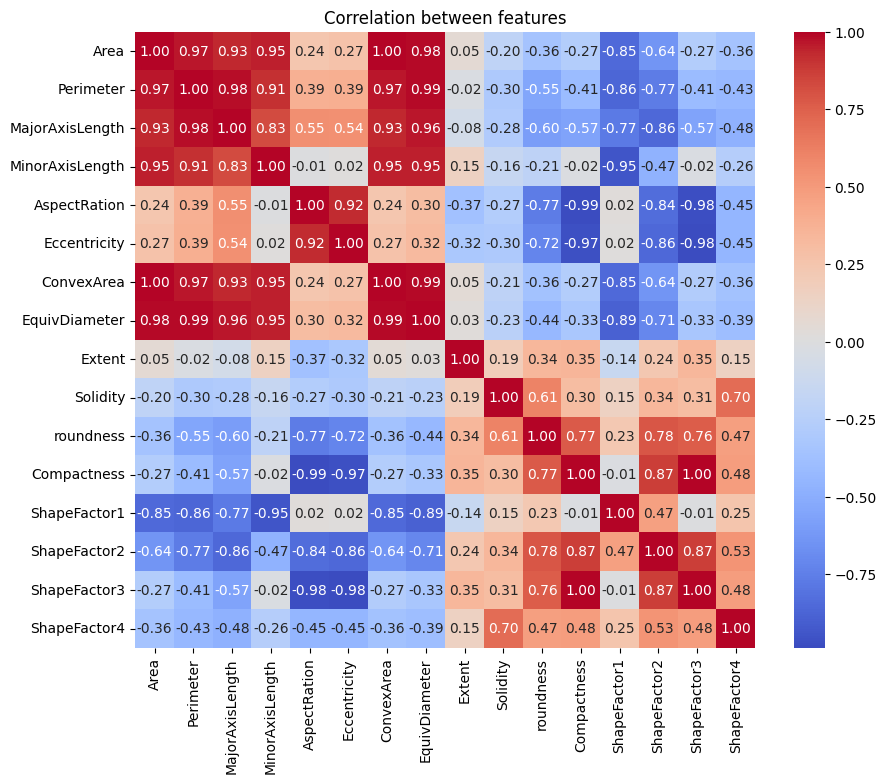

In [31]:
correlation_matrix = beans.iloc[:, :16].corr()

# Display correlation matrix of features as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between features')
plt.show()


Distribution of features:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   


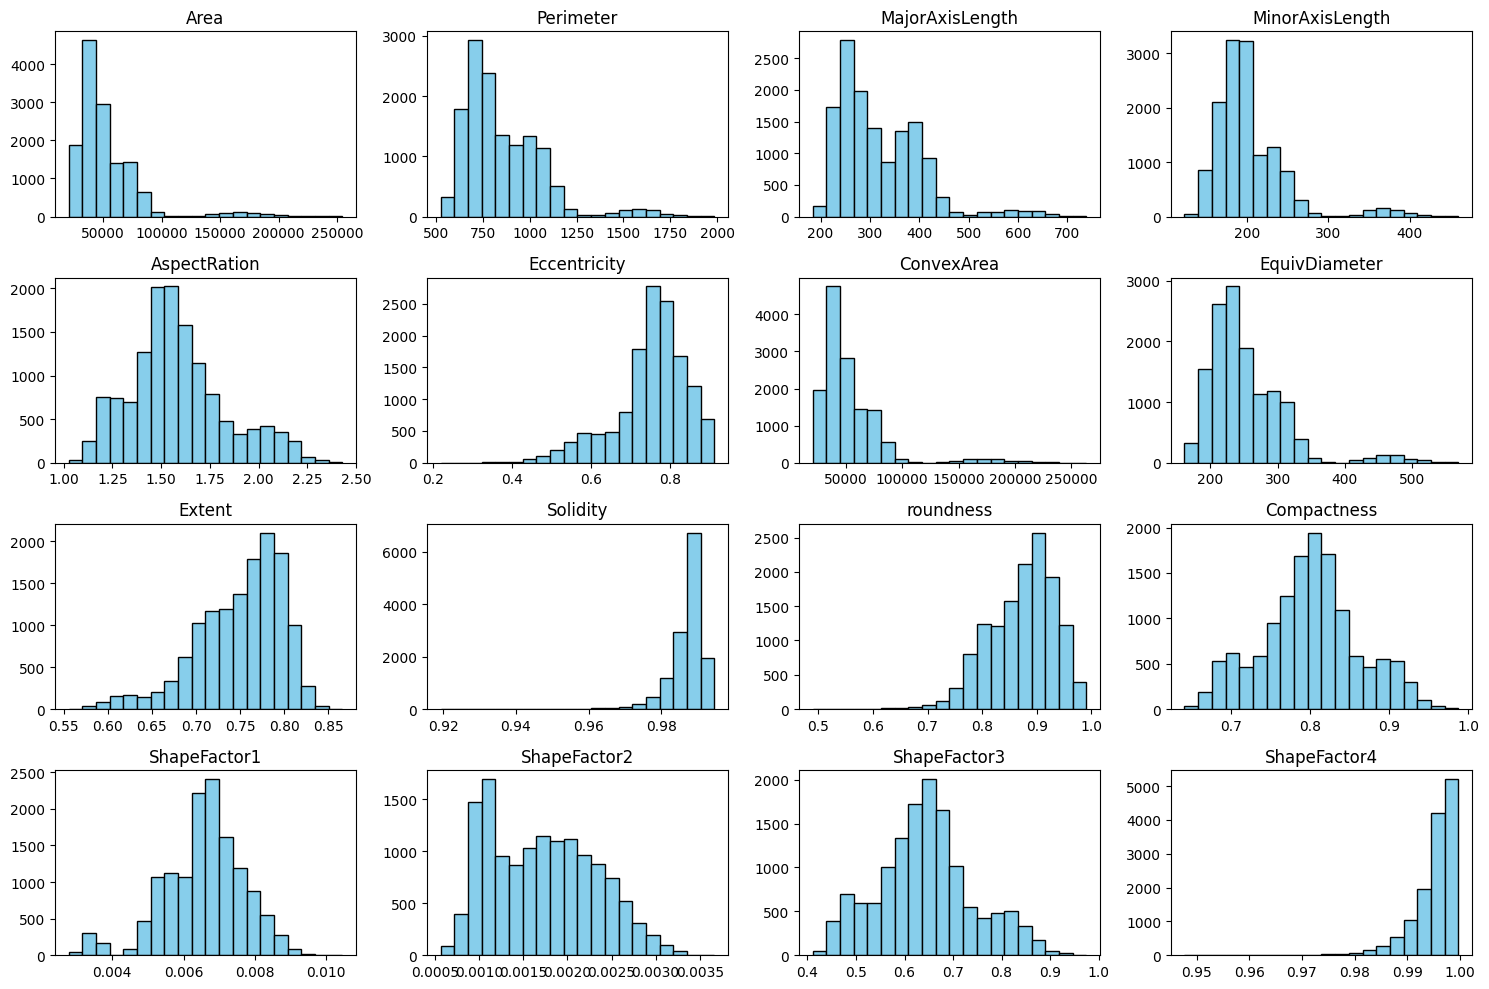

In [32]:
# Explore distribution of features
print("\nDistribution of features:")
print(beans.describe())

# Plot distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(beans.columns[:-1]):
    plt.subplot(4, 4, i+1)
    plt.hist(beans[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
plt.tight_layout()
plt.show()

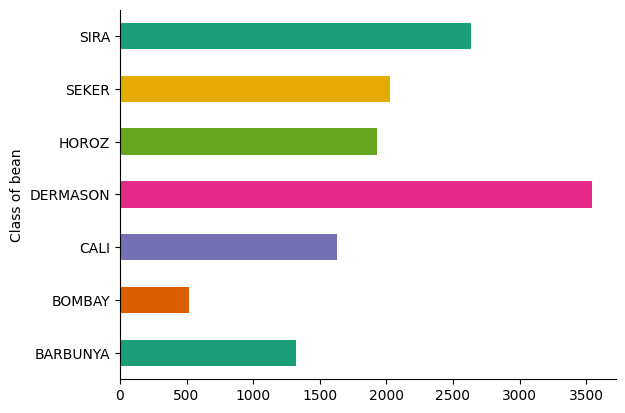

In [33]:
# Plot distribution of classes
beans.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.ylabel('Class of bean')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Replace missing values and split the data**

In [34]:
# Replace missing values with mean
imputer = SimpleImputer(strategy='mean')
beans.iloc[:, :-1] = imputer.fit_transform(beans.iloc[:, :-1])

# Split the dataset
X = beans.iloc[:, :-1]
y = beans['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Build models**

In [35]:
# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build models
models = {
    "Multinomial Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=10000, solver='saga', C=1.0),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=10000, random_state=42)),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

## **Train and evaluate models**

In [36]:
results = {}
conf_matrices = {}
roc_curves = {}
reports = {}

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

    # Confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # Classification report
    reports[name] = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    # ROC curve
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:  # Use decision function for SVM
        y_score = model.decision_function(X_test)

    # Binarize the output labels for ROC curve
    y_test_bin = label_binarize(y_test_encoded, classes=np.arange(len(label_encoder.classes_)))
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(label_encoder.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_curves[name] = (fpr, tpr, roc_auc)

# Display results
print("\nAccuracy, Precision, Recall, and F1-score of models on test data:")
results_df = pd.DataFrame(results).T
display(results_df.sort_values(by='accuracy', ascending=False))


Accuracy, Precision, Recall, and F1-score of models on test data:


,accuracy,precision,recall,f1
SVM,0.933896,0.945385,0.942670,0.943976
Neural Network,0.929490,0.940129,0.938235,0.939113
Multinomial Logistic Regression,0.926552,0.939264,0.936901,0.937908
XGBoost,0.926184,0.939769,0.936781,0.938198
Random Forest,0.923981,0.936452,0.932979,0.934616
k-NN,0.923246,0.939486,0.934430,0.936673
Naive Bayes,0.903783,0.911635,0.912132,0.911519
Decision Trees,0.891664,0.906041,0.905641,0.905798


## **Plot confusion matrices**

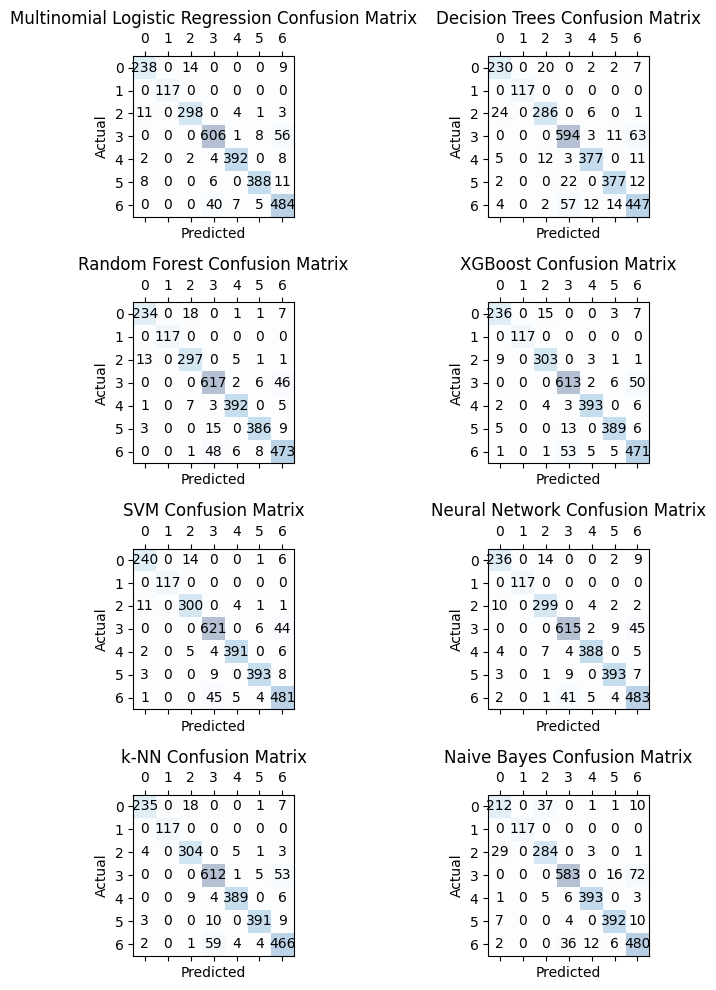

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
axes = axes.flatten()
for i, (name, conf_matrix) in enumerate(conf_matrices.items()):
    ax = axes[i]
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for (j, k), val in np.ndenumerate(conf_matrix):
        ax.text(k, j, val, ha='center', va='center')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()


## **Plot ROC curves**

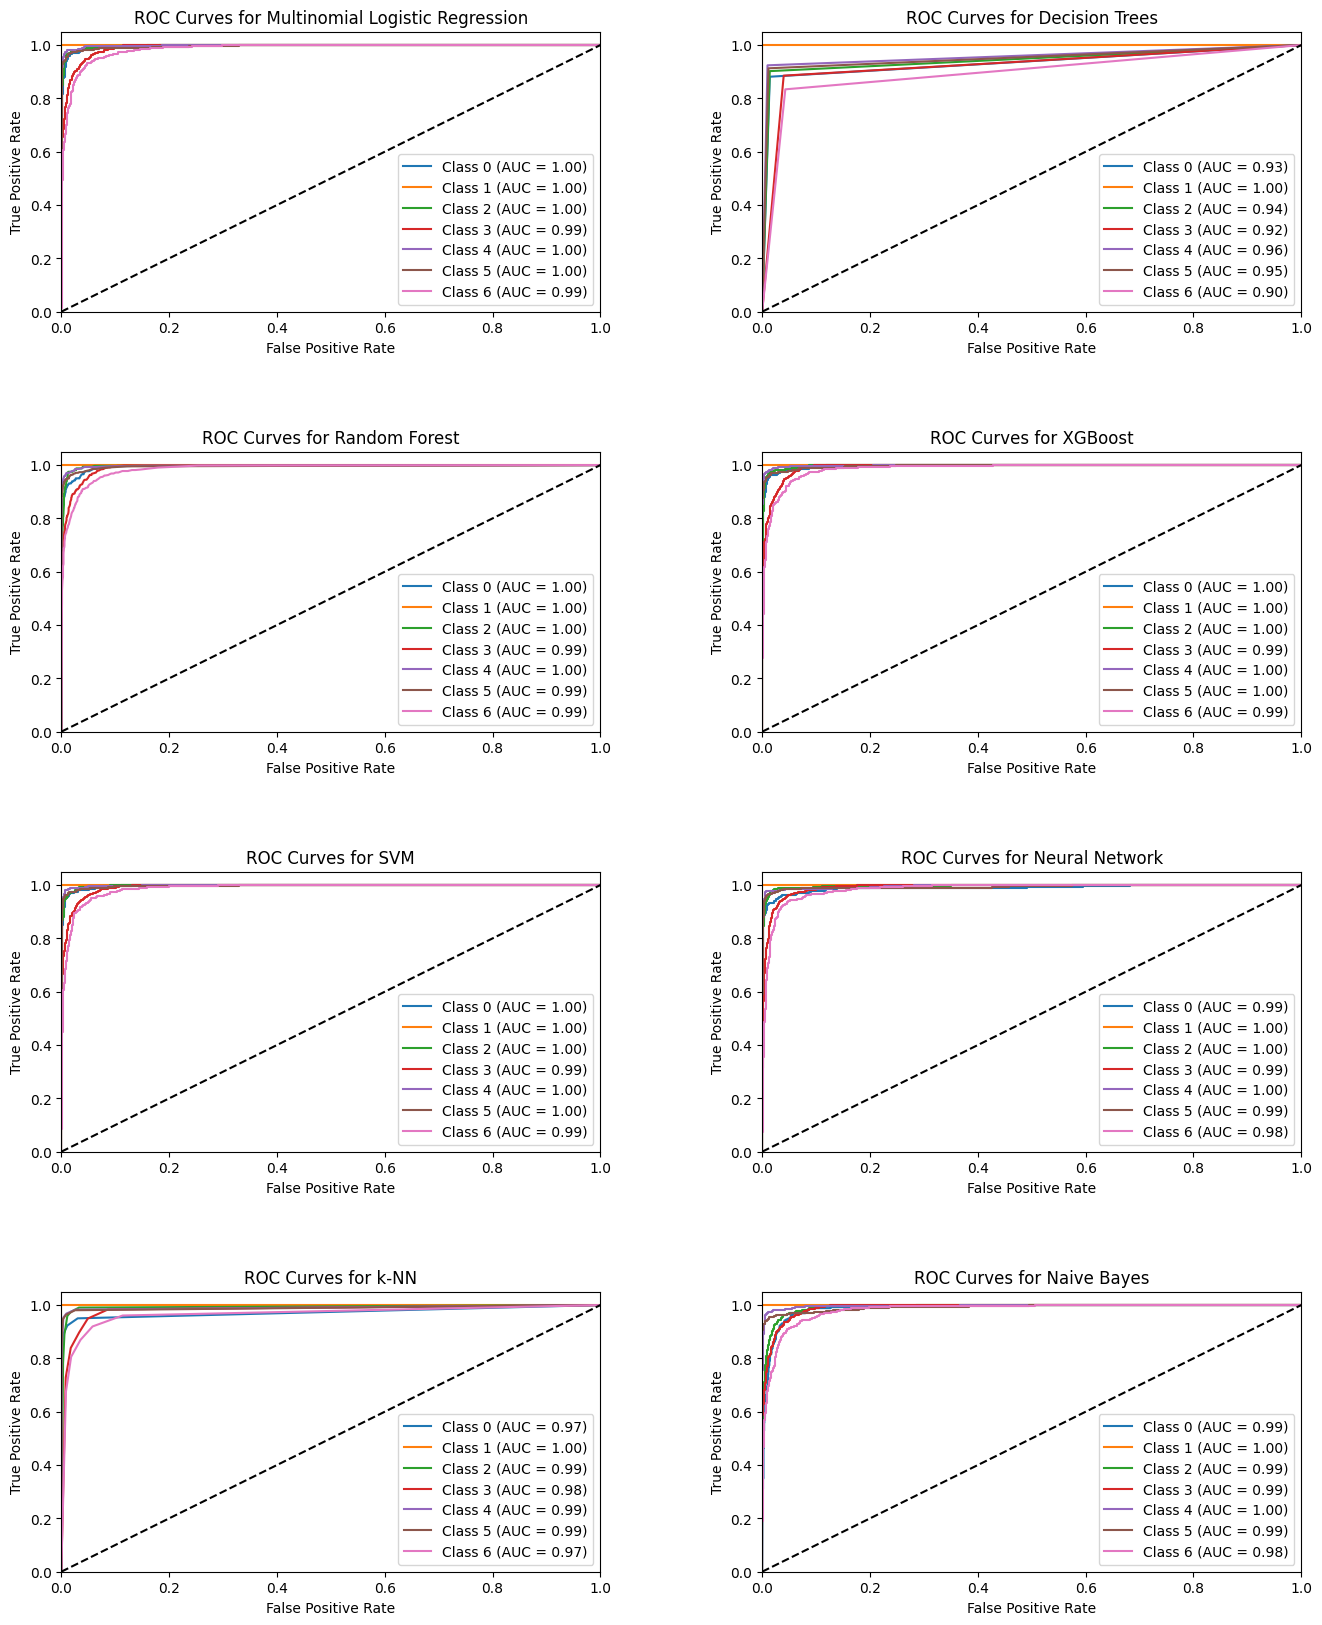

In [38]:
# Binarize the output for multiclass ROC calculation
y_test_bin = label_binarize(y_test, classes=label_encoder.classes_)

# Initialize the figure and axes for 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust space between subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each model and plot ROC curves on subplots
for i, (name, (fpr, tpr, roc_auc)) in enumerate(roc_curves.items()):
    ax = axes[i]

    # Plot ROC curve for each class
    for j in range(len(label_encoder.classes_)):
        ax.plot(fpr[j], tpr[j], label=f'Class {j} (AUC = {roc_auc[j]:.2f})')

    # Plot diagonal line
    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curves for {name}')
    ax.legend(loc='best')

for j in range(len(roc_curves), 8):
    axes[j].axis('off')

plt.show()

## **Print classification reports**

In [39]:
for name, report in reports.items():
    print(f"\nClassification Report for {name}:\n")
    print(report)


Classification Report for Multinomial Logistic Regression:

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.94       317
    DERMASON       0.92      0.90      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723


Classification Report for Decision Trees:

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.88      0.87       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.90      0.90       317
    DERMASON       0.88      0.89      0.88       671
       HOROZ       0.94    